In [43]:
from PIL import Image, ImageDraw
import matplotlib.pyplot as plt
import numpy as np
import math
import random

In [44]:
def random_angle_steps(steps: int, irregularity: float):
    """Generates the division of a circumference in random angles.

    Args:
        steps (int):
            the number of angles to generate.
        irregularity (float):
            variance of the spacing of the angles between consecutive vertices.
    Returns:
        List[float]: the list of the random angles.
    """
    # generate n angle steps
    angles = []
    lower = (2 * math.pi / steps) - irregularity
    upper = (2 * math.pi / steps) + irregularity
    cumsum = 0
    for i in range(steps):
        angle = random.uniform(lower, upper)
        angles.append(angle)
        cumsum += angle

    # normalize the steps so that point 0 and point n+1 are the same
    cumsum /= (2 * math.pi)
    for i in range(steps):
        angles[i] /= cumsum
    return angles


def generate_polygon(center, avg_radius, irregularity, spikiness, num_vertices):
    assert irregularity >= 0 and irregularity <= 1
    assert spikiness >= 0 and spikiness <= 1

    irregularity *= 2 * math.pi / num_vertices
    spikiness *= avg_radius
    angle_steps = random_angle_steps(num_vertices, irregularity)

    # now generate the points
    points = []
    angle = random.uniform(0, 2 * math.pi)
    for i in range(num_vertices):
        radius = np.clip(random.gauss(avg_radius, spikiness), 0, 2 * avg_radius)
        point = (center[0] + radius * math.cos(angle),
                 center[1] + radius * math.sin(angle))
        points.append(point)
        angle += angle_steps[i]

    return points


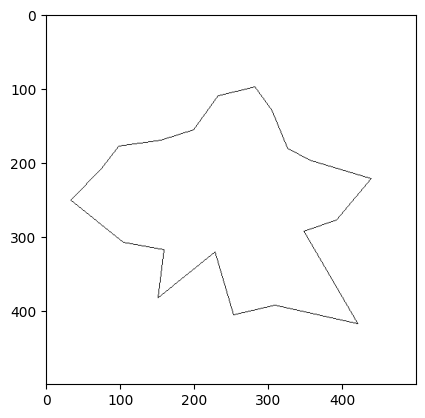

In [48]:
vertices = generate_polygon(center=(250, 250),
                            avg_radius=150,
                            irregularity=0.35,
                            spikiness=0.3,
                            num_vertices=20)

black = (0, 0, 0)
white = (255, 255, 255)
img = Image.new('RGB', (500, 500), white)
im_px_access = img.load()
draw = ImageDraw.Draw(img)

# either use .polygon(), if you want to fill the area with a solid colour
draw.polygon(vertices, outline=black, fill=white)

plt.imshow(img)

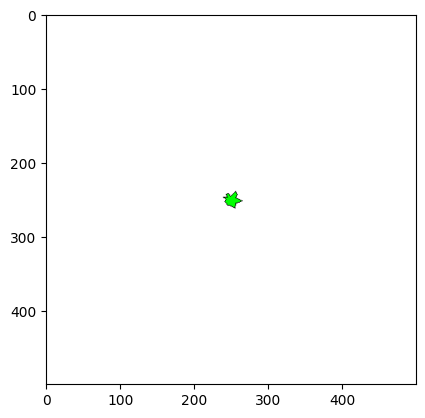

In [53]:
leaf_verts = generate_polygon(center=(250, 250),
                            avg_radius=10,
                            irregularity=0.35,
                            spikiness=0.3,
                            num_vertices=20)

black = (0, 0, 0)
white = (255, 255, 255)
img = Image.new('RGB', (500, 500), white)
im_px_access = img.load()
draw = ImageDraw.Draw(img)

# fill with some green like a leaf
draw.polygon(leaf_verts, outline=black, fill=(0, 255, 0))

plt.imshow(img)